# APHY 140 Exercise 6 (Part 1)

Implemented by: Kernel Godwin Enriquez, Francis Lance Leal, and Timothy Allen Teves

##  Lesson 2. Calculate NDVI Using NAIP Remote Sensing Data in the Python Programming Language

### Installing and loading all the required Python libraries

In [1]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [3]:
os.getcwd()

'C:\\Users\\TIM\\earth-analytics\\data'

### Opening the NAIP data of interest for the NDVI calculation

In [4]:
naip_data_path = os.path.join("cold-springs-fire",
                              "naip",
                              "m_3910505_nw_13_1_20150919",
                              "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

naip_data = rxr.open_rasterio(naip_data_path)

# View shape of the data
naip_data.shape

(4, 2312, 4377)

### Plotting the NDVI calculation of the 2015 NAIP data with a colorbar that reflects the data.

In [5]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])

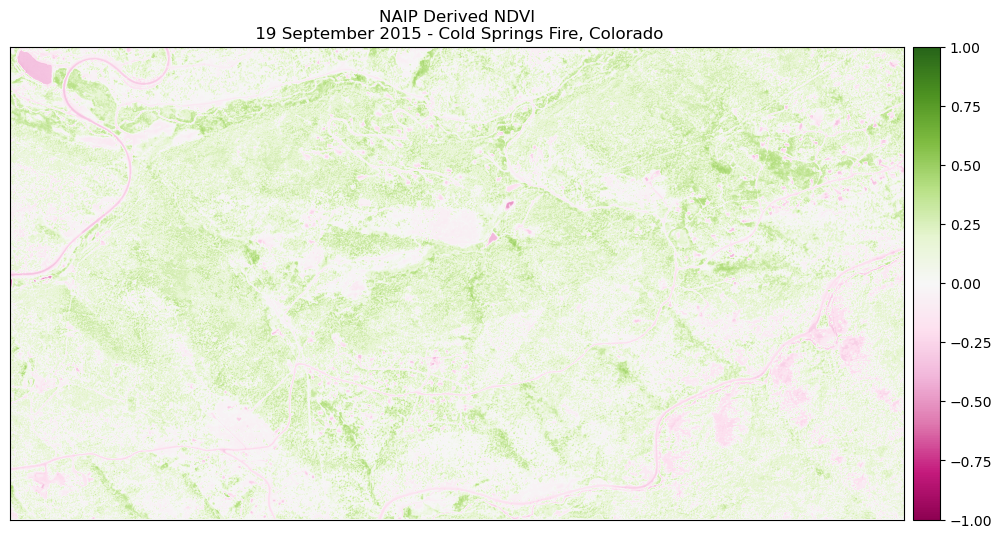

In [6]:
ep.plot_bands(naip_ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")
plt.show()

The Normalized Difference Vegetation Index (NDVI) plot above provides a spatial representation of vegetation health across a landscape prior to the Cold Springs Fire in Colorado. The NDVI values, which range from -1 to 1, are visualized through a contrasting color scheme where green portion indicate high vegetation health and magenta indicate non-vegetated or sparsely vegetated areas. In this figure, a large coverage of light to deep green portion dominates the central and northeastern areas of the map, suggesting the presence of healthy, dense vegetation such as forests or undisturbed grasslands. These areas likely reflect high near-infrared and low red reflectance, which is characteristic of robust photosynthetic activity. On the contrary, clusters of pale pink to magenta regions, especially in the southeastern quadrant, correspond to areas with negative NDVI values. These areas may represent bare soil, rocky outcrops, or possibly existing disturbances such as fire scars or cleared land. The presence of low NDVI values along narrow and curved lines may also suggest river paths or roads that interrupt the vegetated landscape. Additionally, the variation in NDVI values across the figurehighlights the heterogeneity of the landscape, possibly driven by local topography, soil type, or microclimatic conditions.

This image also serves as an important pre-fire baseline for assessing vegetation conditions prior to the July 2016 Cold Springs Fire. The regions of high NDVI during that time could have represented areas of heavy fuel load (e.g. dry leaves, small branches, etc.), thereby contributing to the potential intensity and spread rate of the fire. This makes the image especially useful for pre- and post-fire comparative analysis, including burn severity mapping and vegetation recovery studies. 


### Distribution of NDVI Values

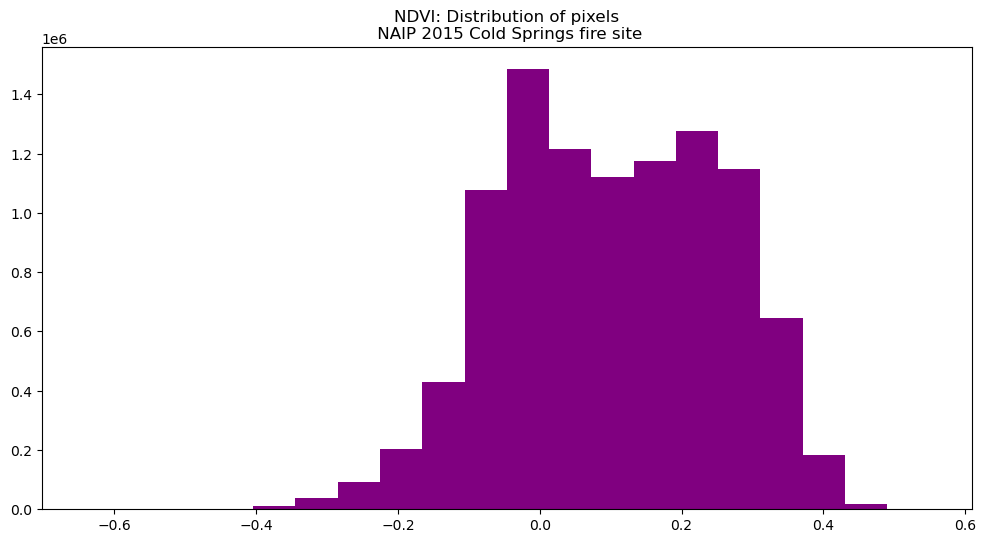

Histogram of NDVI values derived from 2015 NAIP data.


In [7]:
ep.hist(naip_ndvi.values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()
print ("Histogram of NDVI values derived from 2015 NAIP data.")

The histogram of NDVI values from preceding figure provides a statistical overview of vegetation health across the Cold Springs area prior to the fire. The distribution has a single peak and is slightly right-skewed, with most pixel values concentrated between 0.0 and 0.3. This peak suggests that moderate vegetation cover was dominant across the landscape at the time. The histogram gradually decreases toward higher NDVI values (up to 0.6), representing areas of healthy vegetation likely corresponding to dense forest regions. Meanwhile, fewer pixels fall into negative values, indicating that non-vegetated surfaces such as bare soil or water bodies were relatively limited. These low values reflect minimal photosynthetic activity, consistent with high reflectance in both the red and near-infrared bands.

The overall shape of the histogram supports the spatial interpretation from the NDVI map, confirming that the landscape was largely vegetated but heterogeneous. Furthermore, this histogram is especially valuable for detecting vegetation loss or regrowth in future imagery. A leftward shift in the distribution post-fire would suggest widespread vegetation damage, whereas a shift toward higher values would indicate recovery. 


### Exporting a Numpy Array to a Raster Geotiff in Python

In [8]:
type(naip_ndvi), naip_ndvi.dtype

(xarray.core.dataarray.DataArray, dtype('float64'))

In [9]:
naip_ndvi_outpath = os.path.join("cold-springs-fire",
                                 "outputs",
                                 "naip_ndvi.tif")

# Write your the ndvi raster object
naip_ndvi.rio.to_raster(naip_ndvi_outpath)

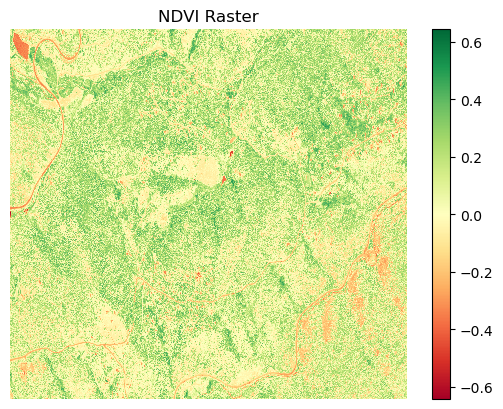

In [12]:
# Viewing the output TIFF file 
ndvi = rxr.open_rasterio("cold-springs-fire/outputs/naip_ndvi.tif", masked=True)
ndvi.plot(cmap="RdYlGn") 
plt.title("NDVI Raster")
plt.axis("off")
plt.show()